# Vascular Endothelium 

Install Packages read in datasets and only use overlapping genes.

In [1]:
!pip install scProject -U
import scProject
import scanpy as sc
import random
import numpy as np
random.seed(a=613)
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('/Users/asherbaraban/PycharmProjects/scProject/scProject/test/targetALS_elim_annotated_20200510/p6counts.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'id')

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(50127, 2996) dataset filter shape
(80, 2996) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Below, we perfrom a regression with .001 weight of regularization and 1% lasso to encourage as many features to show up. Then, with potential features identified, we can establish their robustness by increasing features.

A layer named 'log' has been added to your filtered dataset
Regressing on loglayer of dataset_filtered
(50127, 80)
['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']


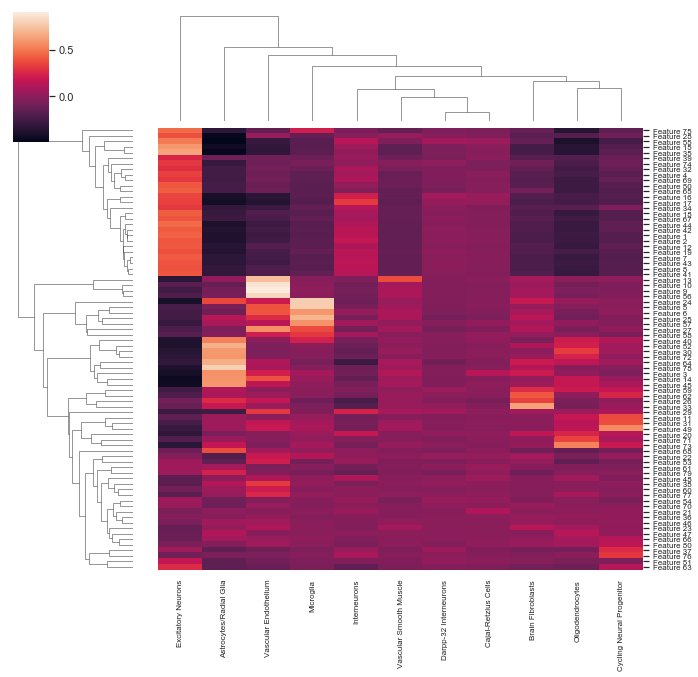

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
dataset_filtered = scProject.matcher.logTransform(dataset_filtered)
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo', .0001, .01,layer='log', iterations=100000)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'assigned_cell_type', 11, 'VascEndo', 'PearsVasc',True)

['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']


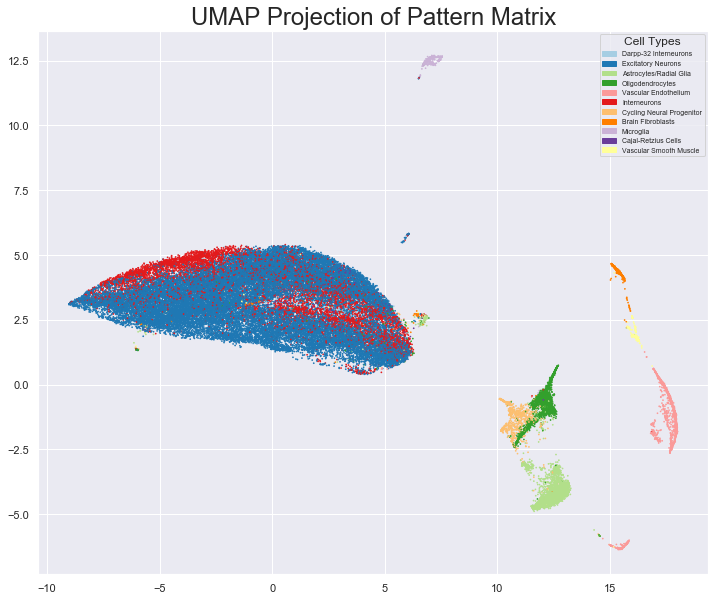

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'assigned_cell_type', 'VascEndo', 'UMAPVasc', 20)

Here we are going to pick features 9, 10, and 38 as they appear to have the highest pearson value for vasc. endo.

In [4]:
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo', 'UMAPVasc', display=False, path='lowregF')

Number of nonzero cells 49202
Number of nonzero cells 48760
Number of nonzero cells 25597


Here we see that features 9 and 10 are very clear markers of vascular endothelium in the P6 mouse cortex. Feature 9 and 10 light up the vascular endothelium in the bottom right corner and the small cluster in the middle left. Now, lets run a new regression, but with more lasso. This will force the model to pick the strongest features to see which features are the strongest drivers of vascular endothelium. Here we are going to make it 50% lasso.

In [5]:
plt.rcParams['figure.figsize']= [10, 13]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo50', .0001, .5, layer='log')
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'assigned_cell_type', 12, 'VascEndo50', 'PearsVasc50', True, row_cluster=False, col_cluster=False,display=False, path='vascEndoPearson.pdf')
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'assigned_cell_type', 'VascEndo50', 'UMAPVasc50', 20,path='UMAPVasc.pdf',display=False)
plt.rcParams['figure.figsize']= [13, 10]
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo50', 'UMAPVasc50', path='vascFeature', display=False)


Regressing on loglayer of dataset_filtered
(50127, 80)
['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Number of nonzero cells 36220
Number of

Feature 9 and 10 stay robust markers and feature 38 persists in those few cells. Let's up the lasso even further to 90%. This encourages even more sparsity and will hopefully confirm that features 9 and 10 are robust markers of vascular endothelium in the P6 mouse cortex.

Regressing on loglayer of dataset_filtered
(50127, 80)
['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


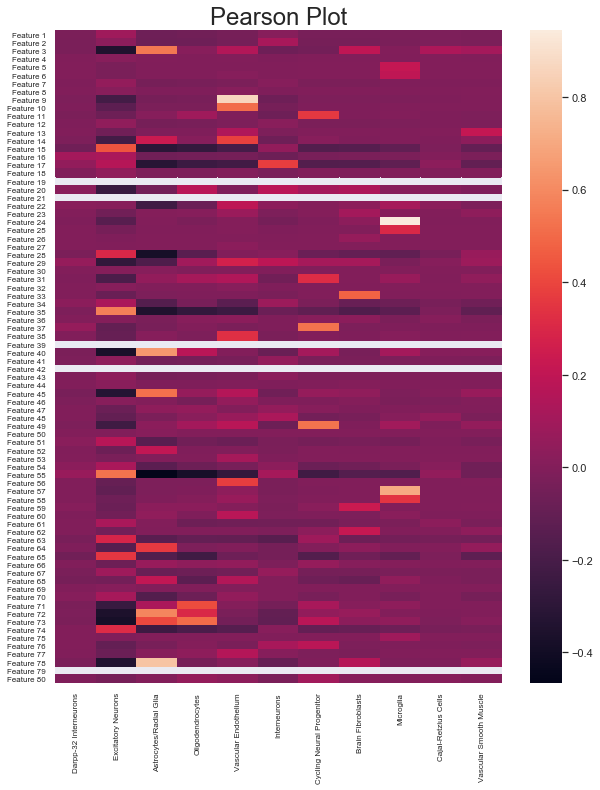

['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', 'Vascular Endothelium', ..., 'Cycling Neural Progenitor', 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']
Length: 11
Categories (11, object): ['Darpp-32 Interneurons', 'Excitatory Neurons', 'Astrocytes/Radial Glia', 'Oligodendrocytes', ..., 'Brain Fibroblasts', 'Microglia', 'Cajal-Retzius Cells', 'Vascular Smooth Muscle']


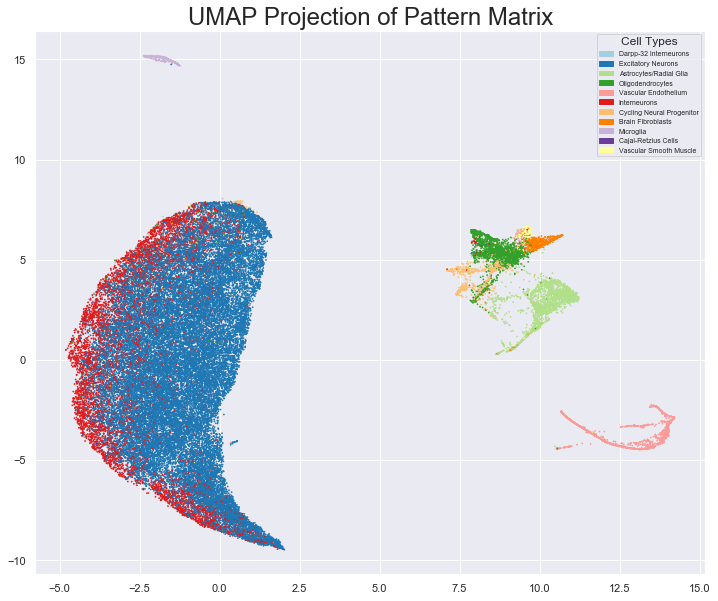

Number of nonzero cells 1540


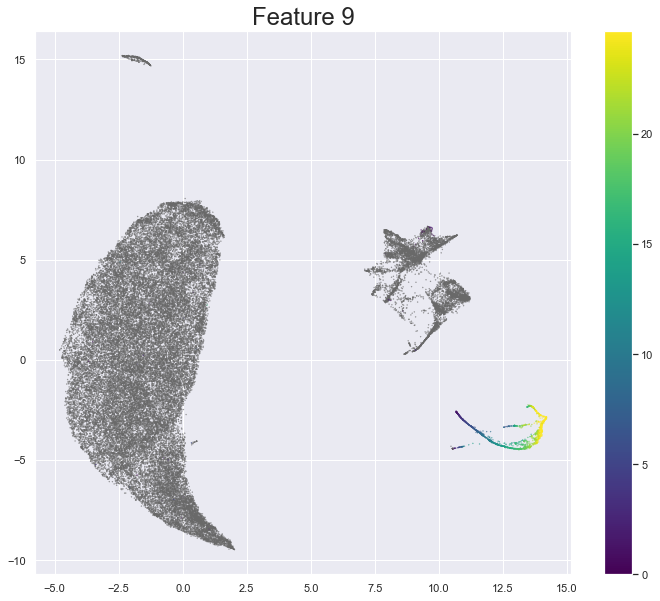

Number of nonzero cells 677


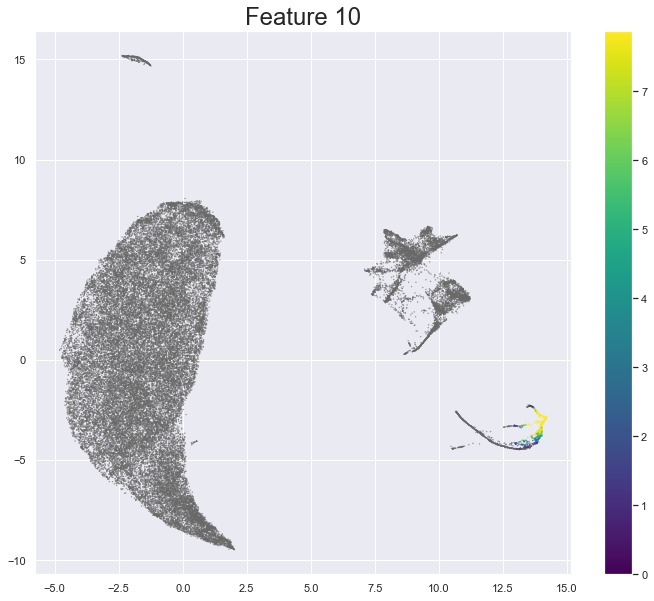

Number of nonzero cells 1914


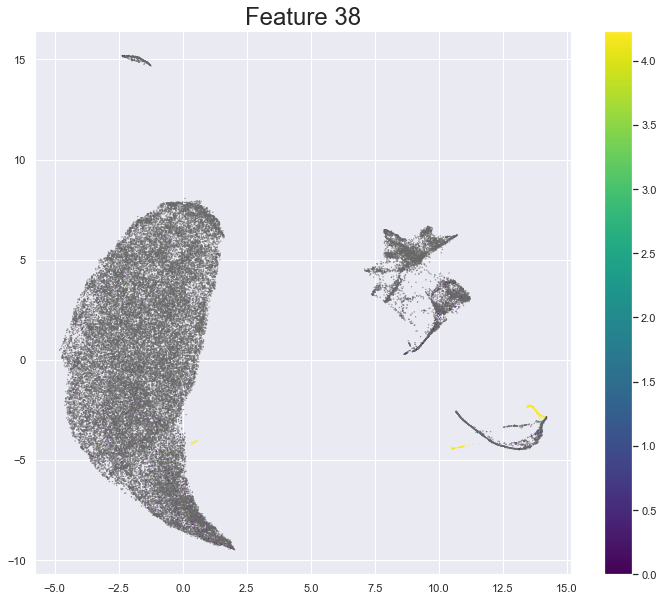

In [6]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'VascEndo90', .0005, .99, layer='log')
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'assigned_cell_type', 11, 'VascEndo90', 'PearsVasc90', True, row_cluster=False, col_cluster=False)
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'assigned_cell_type', 'VascEndo90', 'UMAPVasc90', 20)
scProject.viz.featurePlots(dataset_filtered, [9, 10, 38], 'VascEndo90', 'UMAPVasc90')

Lastly, check the highly expressed genes in the features of interest to get some sense of what the feature does and if it makes sense biologically.

In [7]:
print(scProject.stats.importantGenes(patterns_filtered, 9, .1), "Feature 9 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 10, .1), "Feature 10 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 38, .5), "Feature 38 Genes")

[Index(['ENSMUSG00000049775'], dtype='object', name='index')] Feature 9 Genes
[Index([], dtype='object', name='index')] Feature 10 Genes
[Index(['ENSMUSG00000069919'], dtype='object', name='index')] Feature 38 Genes


Now these are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
<br>
For Feature 9: <br>
ENSMUSG00000016494	CD34 antigen <br>
ENSMUSG00000032766	guanine nucleotide binding protein (G protein), gamma 11 <br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript <br>
ENSMUSG00000007872	inhibitor of DNA binding 3<br>
ENSMUSG00000051855	mesoderm specific transcript<br>
ENSMUSG00000018593	secreted acidic cysteine rich glycoprotein<br>
ENSMUSG00000079523	thymosin, beta 10<br>
ENSMUSG00000049775	thymosin, beta 4, X chromosome<br>
<br>
For Feature 10:<br>
ENSMUSG00000016494	CD34 antigen<br>
ENSMUSG00000032766	guanine nucleotide binding protein (G protein), gamma 11<br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript<br>
ENSMUSG00000032698	LIM domain only 2	Lmo2<br>
ENSMUSG00000051855	mesoderm specific transcript<br>
ENSMUSG00000046402	retinol binding protein 1, cellular<br>
ENSMUSG00000018593	secreted acidic cysteine rich glycoprotein<br>
ENSMUSG00000079523	thymosin, beta 10<br>
ENSMUSG00000049775	thymosin, beta 4, X chromosome<br>
<br>
For Feature 38:<br>
ENSMUSG00000069919	hemoglobin alpha, adult chain 1<br>
<br>
It is worth noting that both feature 9 and 10 have mesoderm specific transcript. This makes sense as vascular endothelium originates in the mesoderm. Also, if you lower the threshold in the important genes method you will see more genes that make biological sense for 9 and 10 being expressed in vascular endothelium.
<br>
For feature 38, since its highest expressed gene is hemoglobin, it would make sense that it is a marker for erythrocytes. It's usage in the doublets makes perfect sense as red blood cells are often in doublets because of their relative size.
<br>
While it is not a new finding that erythrocytes are in doublets or that vascular endothelium originates in the mesoderm, these examples of recapitulating known biology serves as evidence that scProject is capturing biological processes.

scProject can be used to show the distribution of mesoderm specific transcript across features. It can also show which features are chosen by the model to contribute to the mesoderm transcript of expression in the samples.

Feature 9 expresses 7.4802882969379425% of gene ENSMUSG00000051855
Feature 10 expresses 4.399703070521355% of gene ENSMUSG00000051855


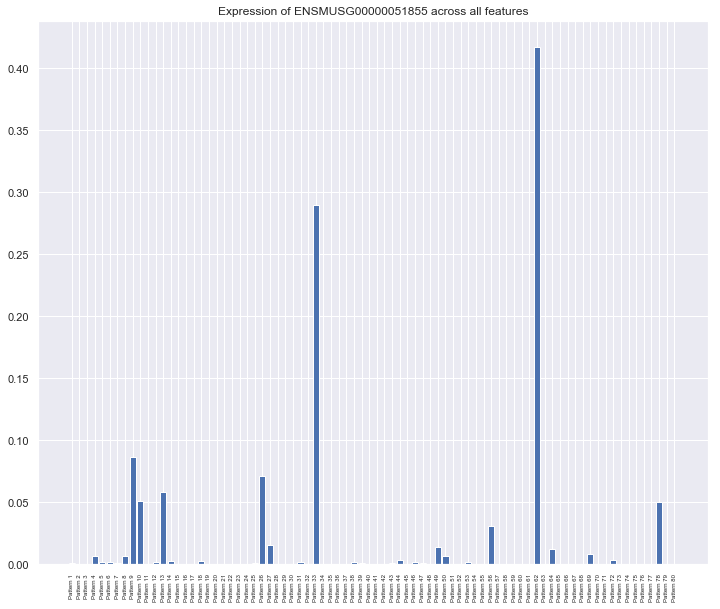

(1549, 80)


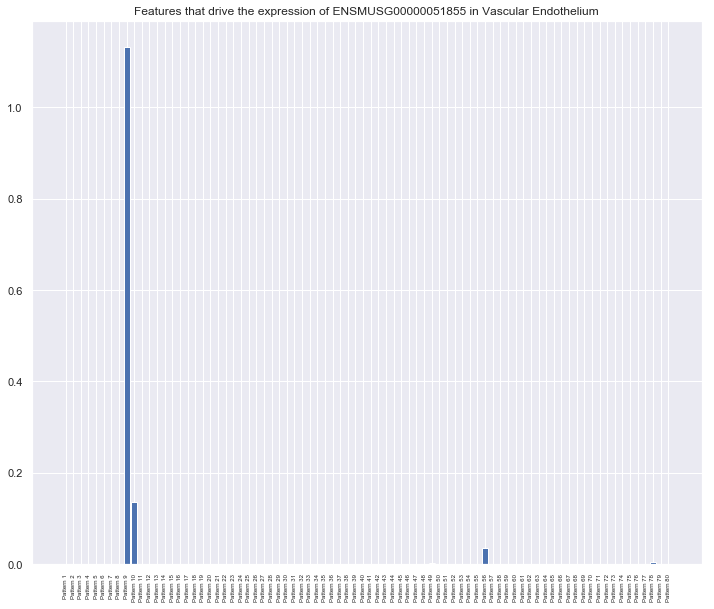

In [8]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000051855', 9, False) # mesoderm
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000051855', 10, True)
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000051855', 'assigned_cell_type',
                                       "Vascular Endothelium", "VascEndo90")


These two plots show how there are plenty of features that express mesoderm specific transcript, but features 9 and 10 were chosen by the model because of the collection and the respecting weighting of the genes, not just mesoderm specific transcript. Below, we will examine Feature 38 and hemaglobin alpha, adult chain 1.

Feature 38 expresses 86.64488196372986% of gene ENSMUSG00000069919


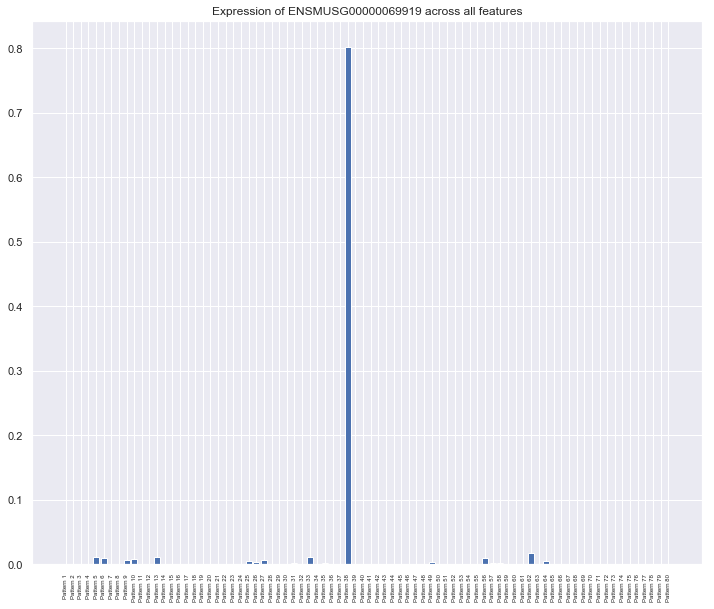

(1549, 80)


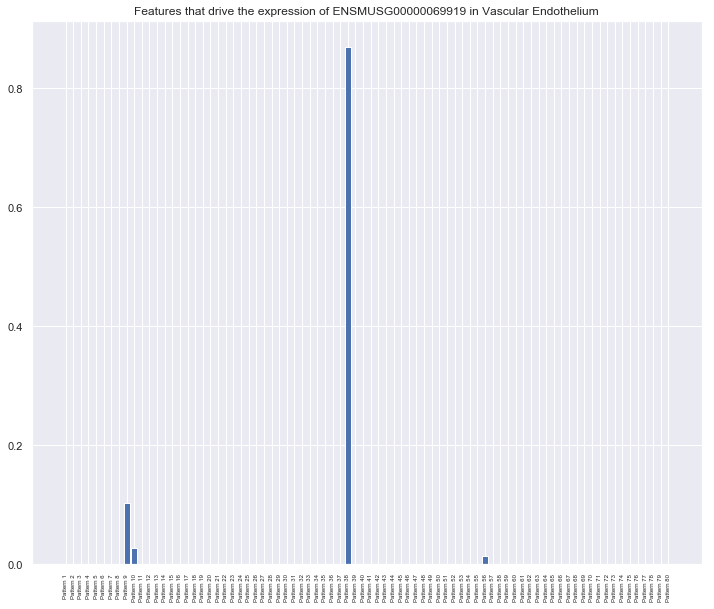

In [9]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000069919', 38, True) #Hemoglobin
scProject.stats.geneDriver(dataset_filtered, patterns_filtered, 'ENSMUSG00000069919', 'assigned_cell_type',
                                       "Vascular Endothelium", "VascEndo90")

The first plot that feature 38 has by far the highest expression of the gene, but the second plot shows that features 9 and 10 are also contributing to the expression of the gene in the sample as the plot is adjusted by actual usage of the features.

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


This subset has shape: (1549, 2996)


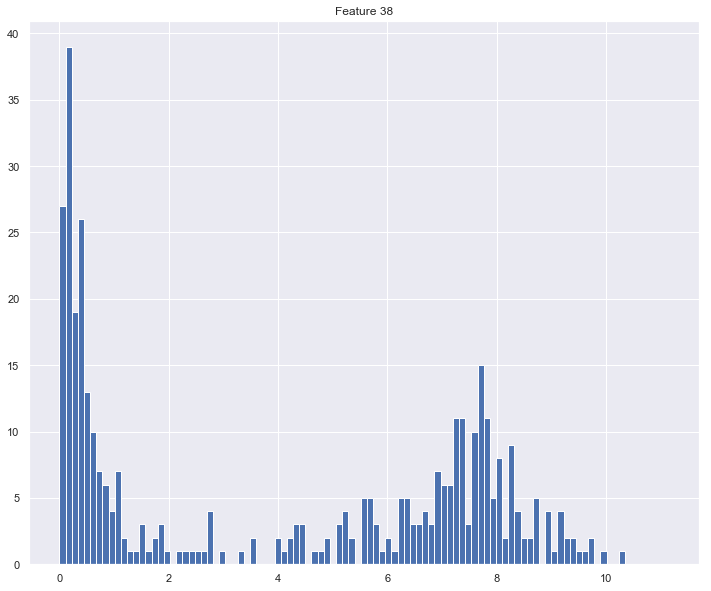

(203, 2996) (1346, 2996) (1549, 2996)


In [10]:
import numpy as np
scProject.viz.patternWeightDistribution(dataset_filtered, 'VascEndo90', [38], obsColumn='assigned_cell_type', subset=['Vascular Endothelium'], numBins=100)
vascEndo38= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Vascular Endothelium'])].copy()

Express38 = vascEndo38[vascEndo38.obsm['VascEndo90'][:, 37] > 3]
Control38 = vascEndo38[vascEndo38.obsm['VascEndo90'][:, 37] <= 3]
print(Express38.shape, Control38.shape, vascEndo38.shape)

Express38.X = np.log2(Express38.X + 1e-30) #log transform for statistical tests
Control38.X = np.log2(Control38.X + 1e-30) #log transform for statistcal tests

C1 is dense
C2 is dense
                       Low        High        rank
gene_short_name                                   
Gypa              8.170821   25.213181   16.692001
Epb41            10.674906   57.082533   33.878719
Snca              5.115280   64.956650   35.035965
Cd24a             9.801984   68.665530   39.233757
Hbb-bs           43.108638   99.300618   71.204628
Hba-a1           48.598368  103.268117   75.933243
Alas2            81.105823   98.681851   89.893837
Hbb-bt           81.587545  112.495905   97.041725
Hba-a2           90.633757  112.209230  101.421494


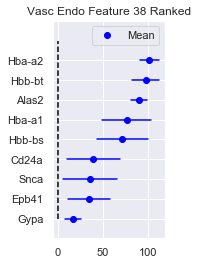

In [11]:
plt.rcParams['figure.figsize']= [5,10]
df38 = scProject.stats.projectionDriver(patterns_filtered, Express38, Control38,.999999999999,'gene_short_name', 38, display=False)

f38CIs = df38[0]
f38CIs['rank'] = (abs(f38CIs['High'])+abs(f38CIs['Low']))/2.0
f38CIsRank = f38CIs.sort_values(by='rank', ascending=True)
f38CIsRank = f38CIsRank.where(f38CIsRank['rank']>.1)
f38CIsRank = f38CIsRank.dropna()
print(f38CIsRank)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [2, 4]
for idx,low, high,y in zip(list(f38CIsRank.index) ,f38CIsRank['Low'], f38CIsRank['High'], range(len(f38CIsRank))):

    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vasc Endo Feature 38 Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("VascEndo38.pdf", bbox_inches='tight')
plt.show()

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


This subset has shape: (1549, 2996)


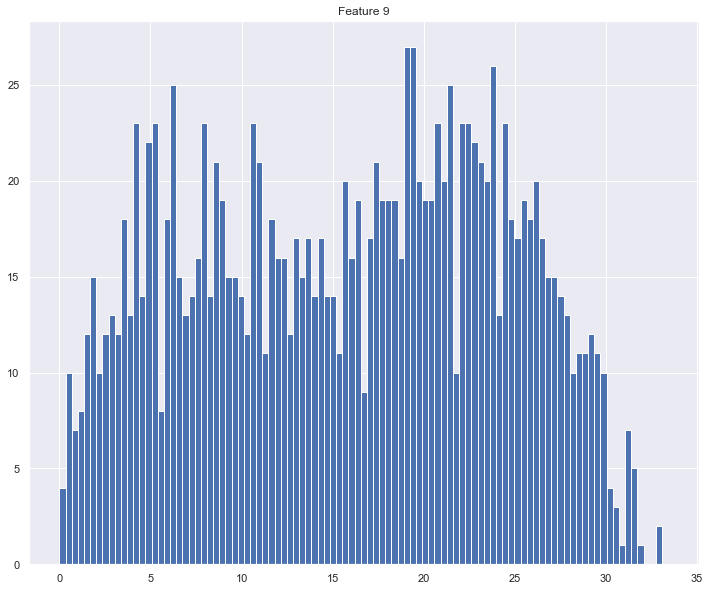

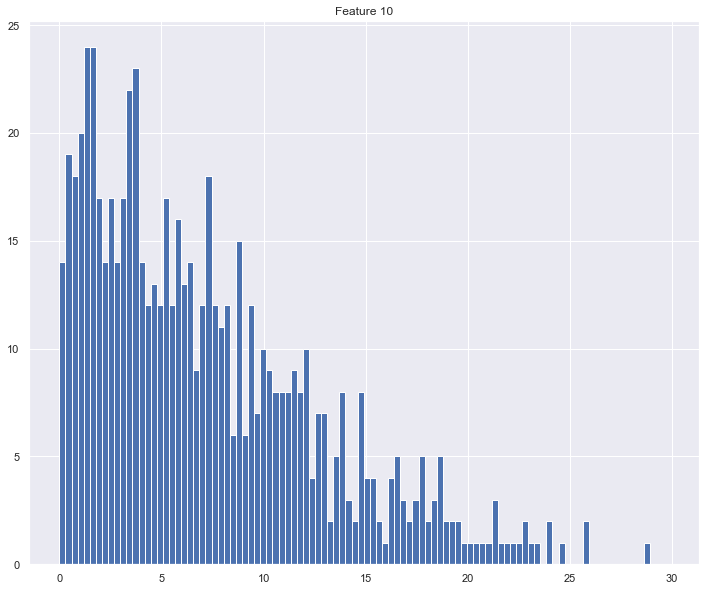

In [12]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.patternWeightDistribution(dataset_filtered, 'VascEndo90', [9,10], obsColumn='assigned_cell_type', subset=['Vascular Endothelium'], numBins=100)
vascEndo= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Vascular Endothelium'])].copy()
others= dataset_filtered.obs['assigned_cell_type'].unique().remove_categories('Vascular Endothelium')
vsAll = dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(list(others))].copy()

vascEndo.X = np.log2(vascEndo.X + 1e-30) #log transform for statistical tests
vsAll.X = np.log2(vsAll.X + 1e-30) #log transform for statistcal tests

Feature 9 Projection Drivers
C1 is dense
C2 is dense


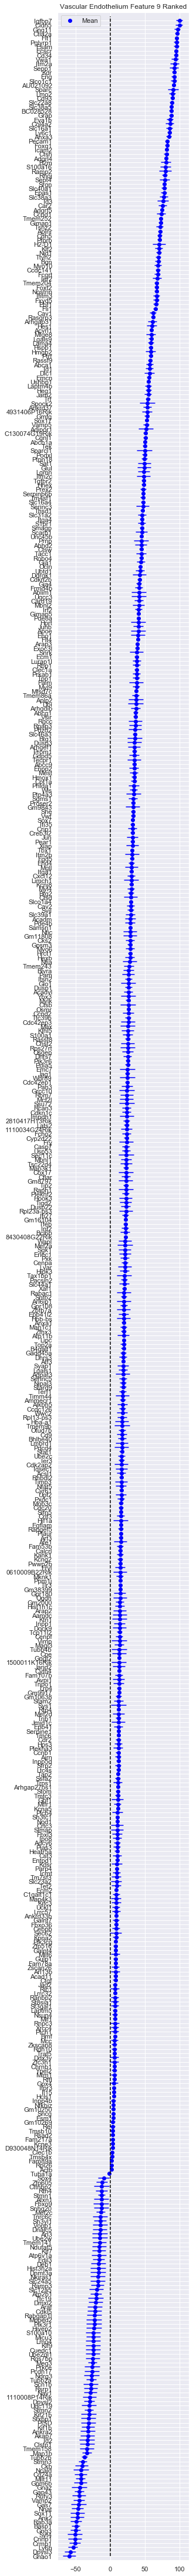

In [13]:
plt.rcParams['figure.figsize']= [5,30]
print("Feature 9 Projection Drivers")
df9 = scProject.stats.projectionDriver(patterns_filtered, vascEndo, vsAll,.999999999999,'gene_short_name', 9, display=False)
f9CIs = df9[0]
f9CIs['rank'] = (f9CIs['High']+f9CIs['Low'])/2.0
f9CIsRank = f9CIs.sort_values(by='rank', ascending=True)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 80]
for idx,low, high,y in zip(list(f9CIsRank.index) ,f9CIsRank['Low'], f9CIsRank['High'], range(len(f9CIsRank))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vascular Endothelium Feature 9 Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("vascEndoFeature9Exp-ControlRanked.pdf", bbox_inches='tight')
plt.show()


Feature 10 Projection Drivers
C1 is dense
C2 is dense


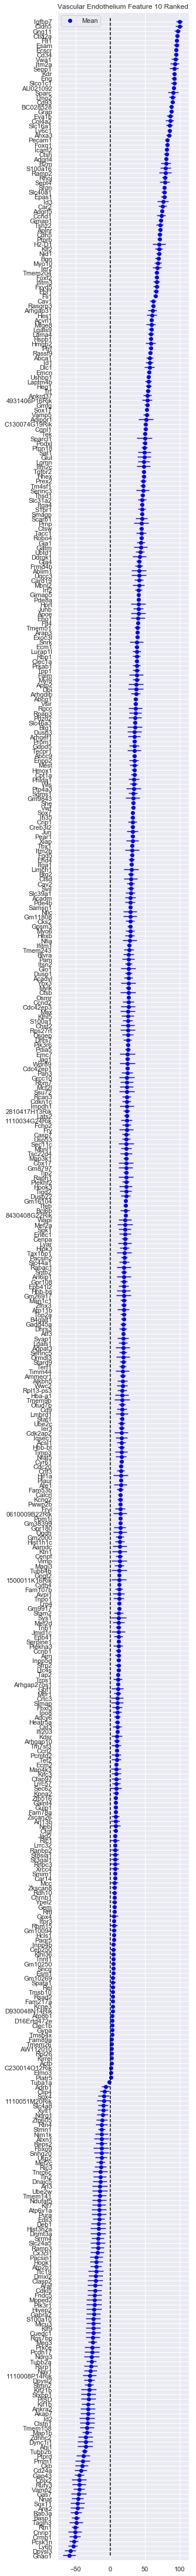

In [14]:
print("Feature 10 Projection Drivers")
df10 = scProject.stats.projectionDriver(patterns_filtered, vascEndo, vsAll,.999999999999,'gene_short_name', 10,display=False)

f10CIs = df10[0]
f10CIs['rank'] = (f10CIs['High']+f10CIs['Low'])/2.0
f10CIsRank = f10CIs.sort_values(by='rank', ascending=True)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 80]
for idx,low, high,y in zip(list(f10CIsRank.index) ,f10CIsRank['Low'], f10CIsRank['High'], range(len(f10CIsRank))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vascular Endothelium Feature 10 Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("vascEndoFeature10Exp-ControlRanked.pdf",bbox_inches='tight')
plt.show()

In [15]:
genes9 = set(df9[0].index)
genes10 = set(df10[0].index)

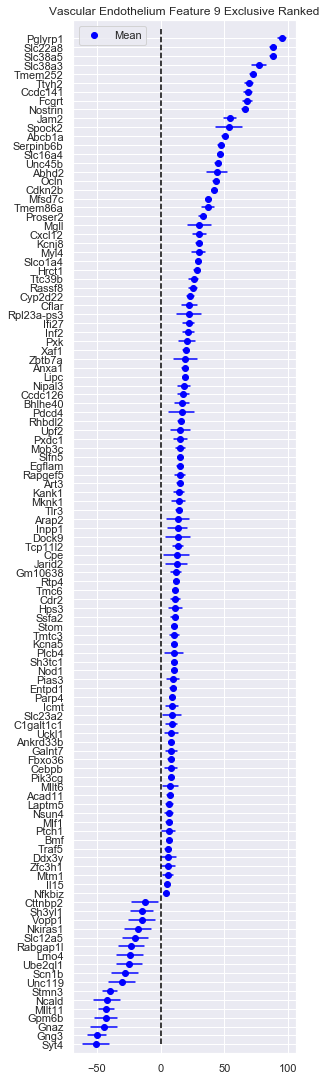

In [16]:
in9 = genes9.difference(genes10)
just9CIs = df9[0].loc[in9]

just9CIs['rank'] = (just9CIs['High']+just9CIs['Low'])/2.0
just9CIsRank = just9CIs.sort_values(by='rank', ascending=True)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 19]
for idx,low, high,y in zip(list(just9CIsRank.index) ,just9CIsRank['Low'], just9CIsRank['High'], range(len(just9CIsRank))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vascular Endothelium Feature 9 Exclusive Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("Just9.pdf", bbox_inches='tight')
plt.show()


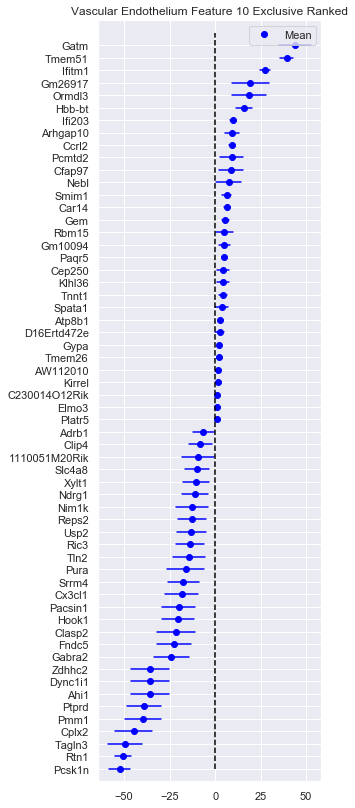

In [17]:

in10 =genes10.difference(genes9)
just10CIs = df10[0].loc[in10]

just10CIs['rank'] = (just10CIs['High']+just10CIs['Low'])/2.0
just10CIsRank = just10CIs.sort_values(by='rank', ascending=True)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 14]
for idx,low, high,y in zip(list(just10CIsRank.index) ,just10CIsRank['Low'], just10CIsRank['High'], range(len(just10CIsRank))):
    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vascular Endothelium Feature 10 Exclusive Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("Just10.pdf", bbox_inches='tight')
plt.show()

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


This subset has shape: (1549, 2996)


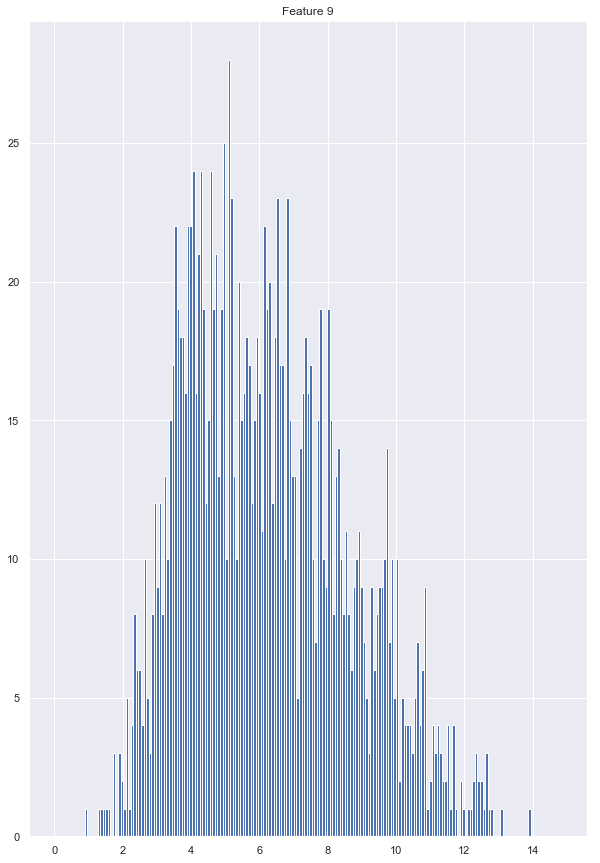

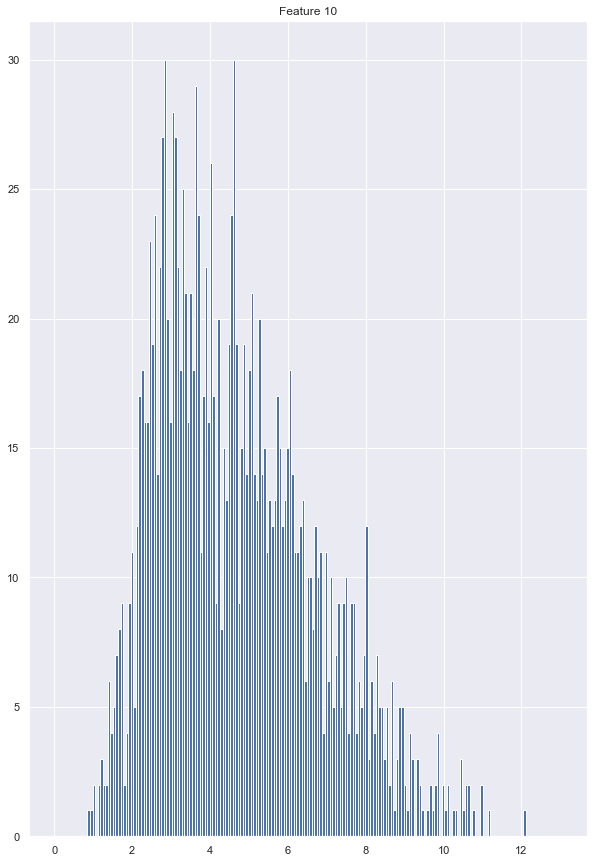

(989, 2996) (560, 2996) (1549, 2996)


In [18]:
plt.rcParams['figure.figsize']= [10, 15]
scProject.viz.patternWeightDistribution(dataset_filtered, 'VascEndo', [9,10], obsColumn='assigned_cell_type', subset=['Vascular Endothelium'], numBins=200)
vascEndo9= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Vascular Endothelium'])].copy()

Express9 = vascEndo9[vascEndo9.obsm['VascEndo'][:, 8] > 5]
Control9 = vascEndo9[vascEndo9.obsm['VascEndo'][:, 8] <= 5]
print(Express9.shape, Control9.shape, vascEndo9.shape)

Express9.X = np.log2(Express9.X + 1e-30) #log transform for statistical tests
Control9.X = np.log2(Control9.X + 1e-30) #log transform for statistcal tests

C1 is dense
C2 is dense
                       Low       High       rank
gene_short_name                                 
mt-Atp6           1.147189   2.142592   1.644891
mt-Co3            0.499141   2.924715   1.711928
Tmsb4x            1.386602   2.051457   1.719029
Actb              0.479501   3.045671   1.762586
Calm1             1.377704   2.188043   1.782874
...                    ...        ...        ...
Pdzd2            23.109008  62.356736  42.732872
Ptrf             23.149651  62.367882  42.758766
Acvrl1           23.311475  62.295421  42.803448
Scarb1           23.710911  61.915386  42.813148
Foxf2            24.463343  61.581045  43.022194

[467 rows x 3 columns]


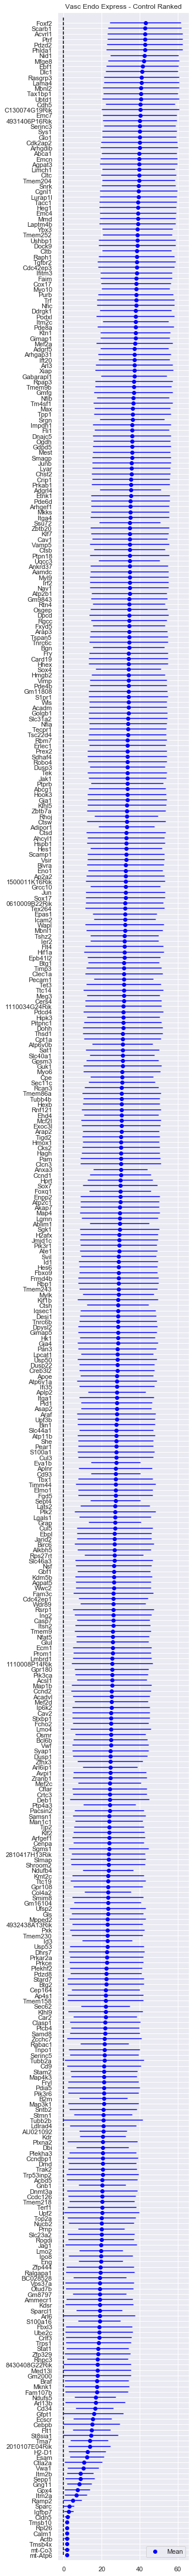

In [19]:
plt.rcParams['figure.figsize']= [5,10]
df9 = scProject.stats.projectionDriver(patterns_filtered, Express9, Control9,.999999999999,'gene_short_name', 9, display=False)

f9CIs = df9[0]
f9CIs['rank'] = (abs(f9CIs['High'])+abs(f9CIs['Low']))/2.0
f9CIsRank = f9CIs.sort_values(by='rank', ascending=True)
f9CIsRank = f9CIsRank.where(f9CIsRank['rank']>1)
f9CIsRank = f9CIsRank.dropna()
print(f9CIsRank)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 80]
for idx,low, high,y in zip(list(f9CIsRank.index) ,f9CIsRank['Low'], f9CIsRank['High'], range(len(f9CIsRank))):

    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vasc Endo Express - Control Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("VascEndo9E-C.pdf", bbox_inches='tight')
plt.show()

/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


This subset has shape: (1549, 2996)


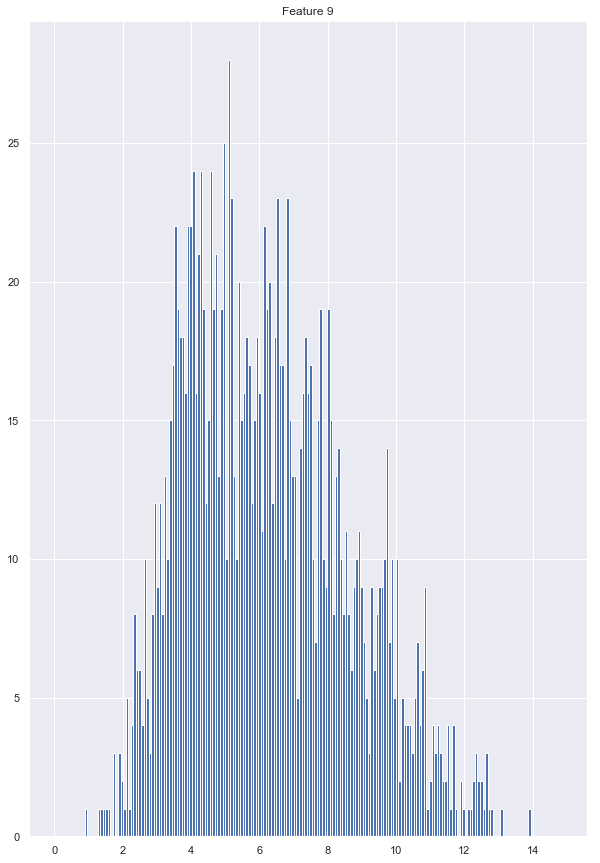

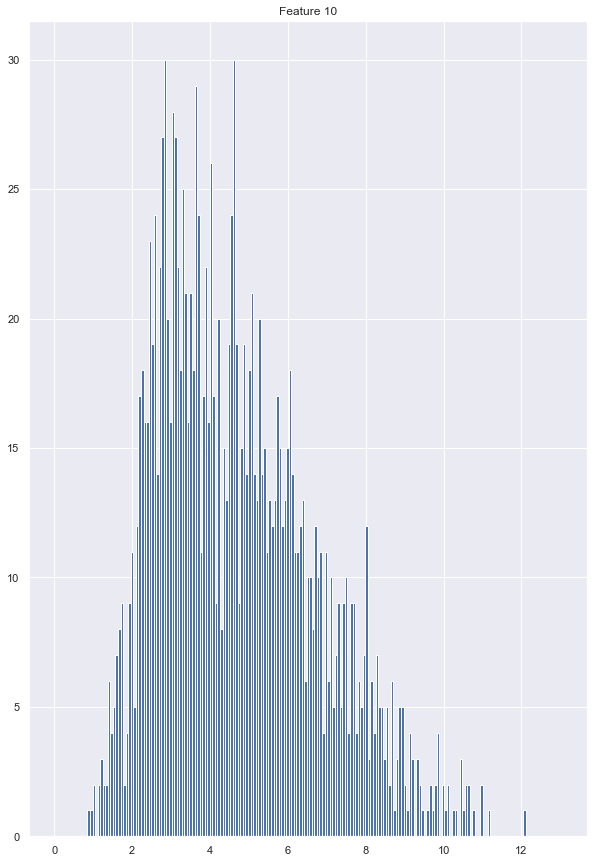

(989, 2996) (560, 2996) (1549, 2996)
C1 is dense
C2 is dense
                       Low       High       rank
gene_short_name                                 
mt-Atp6           1.207141   2.137661   1.672401
Tmsb4x            1.405776   2.018073   1.711925
Calm1             1.406981   2.159418   1.783200
Actb              0.555581   3.013320   1.784451
Cldn5             0.656599   2.982296   1.819448
...                    ...        ...        ...
Mfge8            26.306022  61.200303  43.753162
Foxf2            27.226927  62.225168  44.726048
Nid1             28.572911  61.716594  45.144753
Cltc             27.834301  64.096272  45.965286
Phlda1           27.329361  64.655243  45.992302

[419 rows x 3 columns]


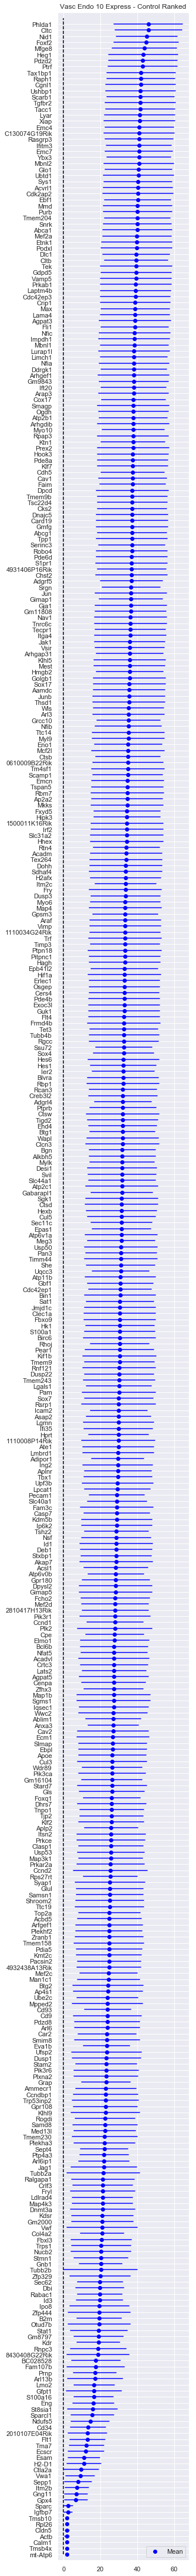

In [20]:
plt.rcParams['figure.figsize']= [10, 15]
scProject.viz.patternWeightDistribution(dataset_filtered, 'VascEndo', [9,10], obsColumn='assigned_cell_type', subset=['Vascular Endothelium'], numBins=200)
vascEndo10= dataset_filtered[dataset_filtered.obs['assigned_cell_type'].isin(['Vascular Endothelium'])].copy()

Express10 = vascEndo10[vascEndo10.obsm['VascEndo'][:, 9] > 4.25]
Control10 = vascEndo10[vascEndo10.obsm['VascEndo'][:, 9] <= 4.25]
print(Express9.shape, Control9.shape, vascEndo9.shape)

Express10.X = np.log2(Express10.X + 1e-30) #log transform for statistical tests
Control10.X = np.log2(Control10.X + 1e-30) #log transform for statistcal tests
plt.rcParams['figure.figsize']= [5,10]


df10 = scProject.stats.projectionDriver(patterns_filtered, Express10, Control10,.999999999999,'gene_short_name', 10, display=False)

f10CIs = df10[0]
f10CIs['rank'] = (abs(f10CIs['High'])+abs(f10CIs['Low']))/2.0
f10CIsRank = f10CIs.sort_values(by='rank', ascending=True)
f10CIsRank = f10CIsRank.where(f9CIsRank['rank']>1)
f10CIsRank = f10CIsRank.dropna()
print(f10CIsRank)
counter = 0
yAxis = []
plt.rcParams['figure.figsize']= [4, 80]
for idx,low, high,y in zip(list(f10CIsRank.index) ,f10CIsRank['Low'], f10CIsRank['High'], range(len(f10CIsRank))):

    plt.plot((low, high), (counter, counter), '-', color='blue')
    if counter is 0:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue', label='Mean')
    else:
        plt.plot((float(low+high)/2.0), counter,'o', color='blue')
    yAxis.append(idx)
    counter+=1

plt.yticks(range(len(yAxis)), yAxis)
plt.title("Vasc Endo 10 Express - Control Ranked")
plt.plot((0,0), (0,len(yAxis)), '--', color='black')
plt.ylim(top= len(yAxis)+1)
plt.ylim(bottom=-1)
plt.legend()
plt.savefig("VascEndo10E-C.pdf", bbox_inches='tight')
plt.show()